# **Experiment-10. Implement K-means clustering. Use appropriate dataset and evaluate the algorithm.**

**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, confusion_matrix

**Load Dataset**

In [ ]:
df = sns.load_dataset("penguins")
print("✅ Dataset Loaded Successfully!")
print("Shape:", df.shape)
display(df.head())

✅ Dataset Loaded Successfully!
Shape: (344, 7)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


**Data Analysis and Visualisation**

In [ ]:
# Check for nulls and data types
print("\n🔍 Dataset Info:")
df.info()

print("\n📊 Missing Values:\n", df.isnull().sum())


🔍 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB

📊 Missing Values:
 species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


In [ ]:
# Drop rows with missing values
df.dropna(inplace=True)

In [ ]:
# Descriptive statistics
display(df.describe())

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


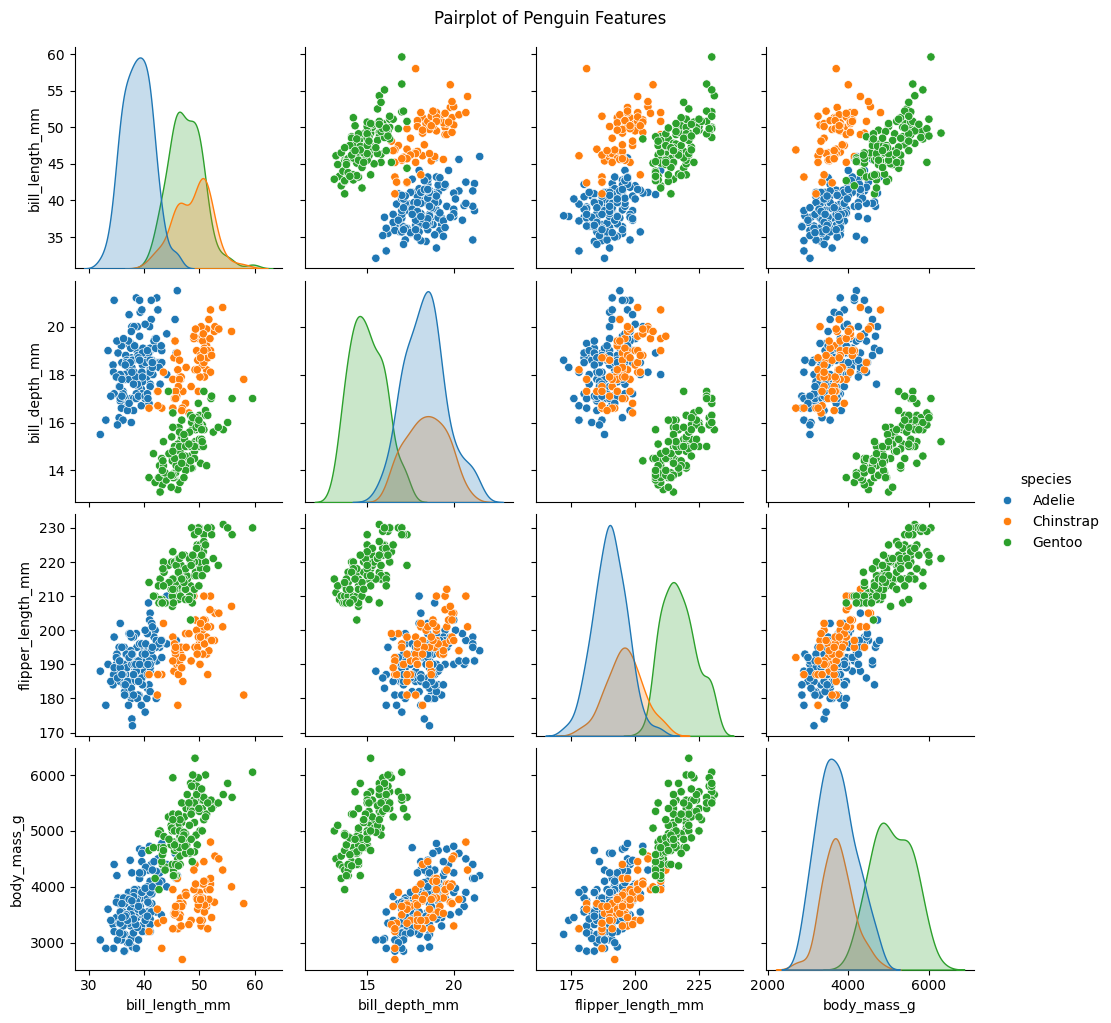

In [ ]:
# Pairplot for numeric columns
sns.pairplot(df, hue='species', diag_kind='kde')
plt.suptitle("Pairplot of Penguin Features", y=1.02)
plt.show()

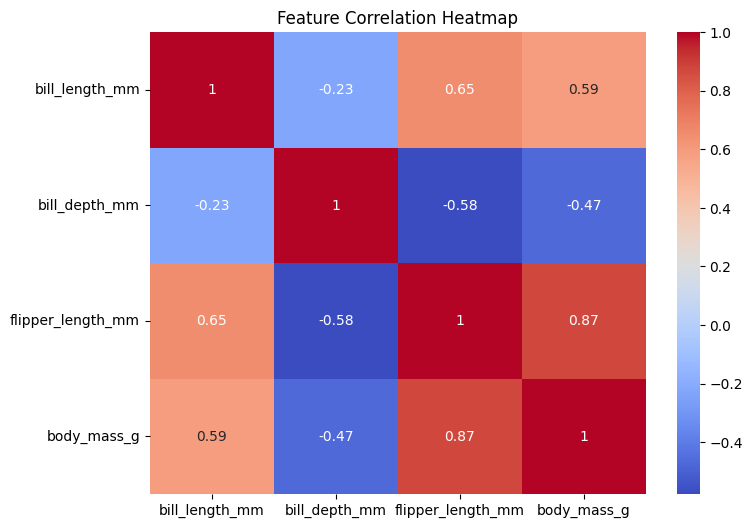

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

**Data Encoding**

In [ ]:
# Encode categorical columns
df_encoded = df.copy()
df_encoded['sex'] = df_encoded['sex'].map({'Male': 0, 'Female': 1})

# Select numeric columns for clustering
X = df_encoded[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]

**Feature Scaling**

In [ ]:
# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("\nData standardized successfully!")


Data standardized successfully!


**Finding Optimal K means clustering Elbow Method**

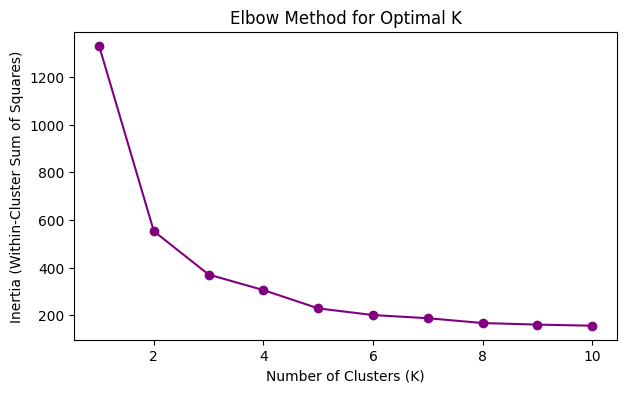

In [ ]:
inertias = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(7,4))
plt.plot(K_range, inertias, marker='o', color='purple')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

print("\nCluster Centers (Scaled):\n", kmeans.cluster_centers_)


Cluster Centers (Scaled):
 [[-1.04680889  0.48662566 -0.88169491 -0.7627539 ]
 [ 0.65475809 -1.10270671  1.16246305  1.10121078]
 [ 0.67202511  0.80526339 -0.28934658 -0.38410387]]


**Silhoutte Score**

In [ ]:
sil_score = silhouette_score(X_scaled, df['Cluster'])
print(f"\n🧩 Silhouette Score: {sil_score:.3f}")


🧩 Silhouette Score: 0.446


**PCA Visaulisation**

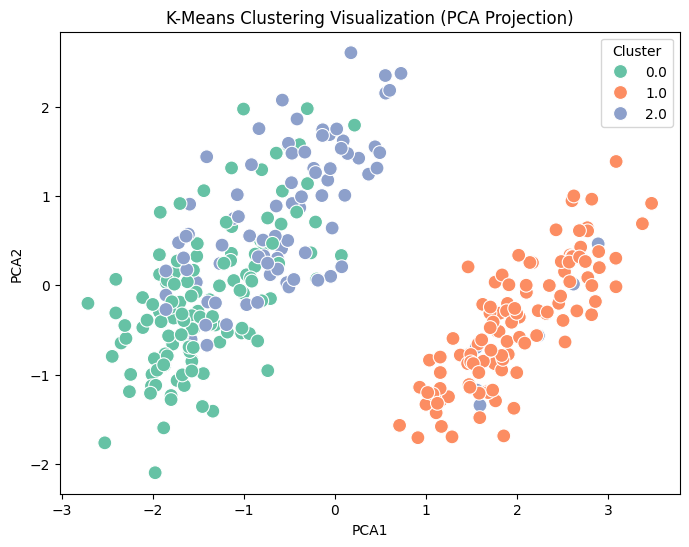

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = df['Cluster']
pca_df['species'] = df['species']

plt.figure(figsize=(8,6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', palette='Set2', data=pca_df, s=100)
plt.title("K-Means Clustering Visualization (PCA Projection)")
plt.show()

In [ ]:
conf_mat = pd.crosstab(df['species'], df['Cluster'])
print("\nConfusion Matrix (Species vs Cluster):\n")
print(conf_mat)


Confusion Matrix (Species vs Cluster):

Cluster      0    1   2
species                
Adelie     124    0  22
Chinstrap    5    0  63
Gentoo       0  119   0


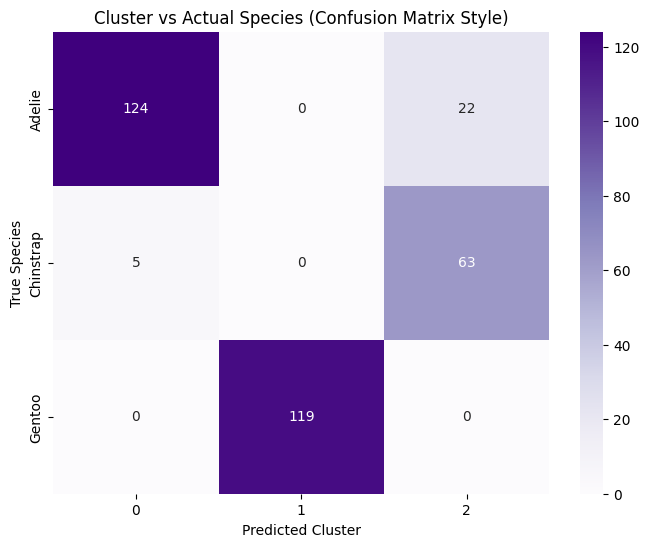

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Purples')
plt.title("Cluster vs Actual Species (Confusion Matrix Style)")
plt.xlabel("Predicted Cluster")
plt.ylabel("True Species")
plt.show()

/tmp/ipython-input-33847284.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='body_mass_g', data=df, palette='coolwarm')


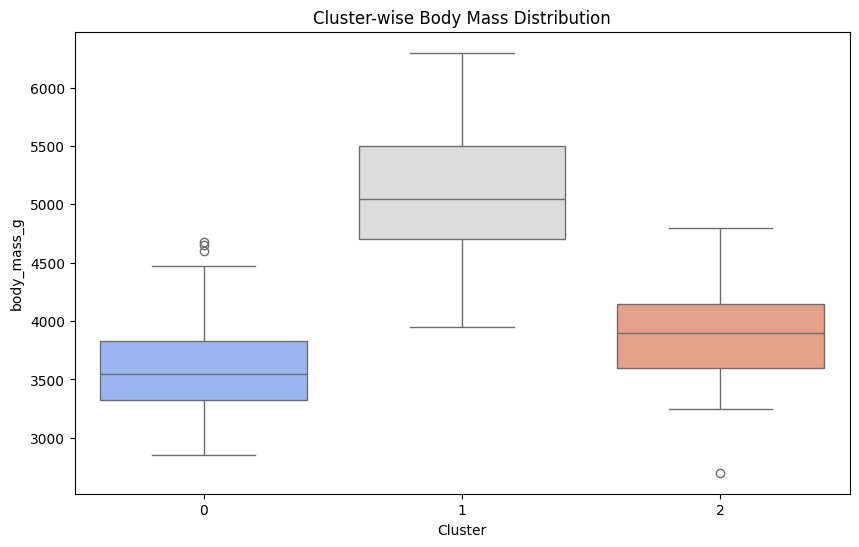

/tmp/ipython-input-33847284.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='flipper_length_mm', data=df, palette='Set3')


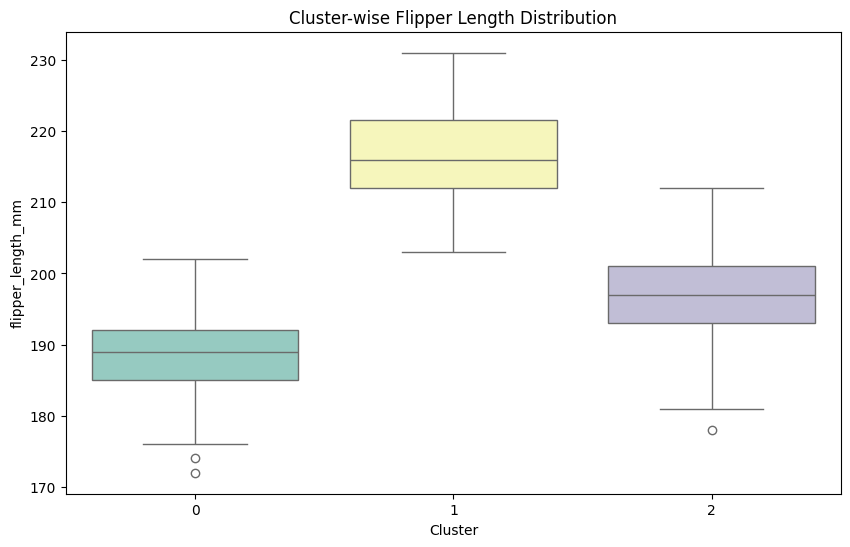

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Cluster', y='body_mass_g', data=df, palette='coolwarm')
plt.title("Cluster-wise Body Mass Distribution")
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x='Cluster', y='flipper_length_mm', data=df, palette='Set3')
plt.title("Cluster-wise Flipper Length Distribution")
plt.show()